In [1]:
# importações necessaria

from datetime import datetime                                                   # trabalho com datas
import pandas as pd                                                             # manipulação dados        
import numpy as np                                                              # calculos matematicos
import matplotlib.pyplot as plt                                                 # visualização grafica  
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  # algoritmos de prev
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf                   # autocorrelação
from statsmodels.tsa.arima.model import ARIMA                                   # modelo ARIMA

# configuração de parametros do grafico
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

# filtro de warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importação e visualização dos dados

stock = pd.read_csv('./data/all-stocks-2006-01-01-to-2018-01-01.csv',
                     index_col='Date', 
                     parse_dates=['Date'])
stock.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM


In [3]:
# apenas ações do 'google'

g_stk = stock.query("Name == 'GOOGL'")
g_stk.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL


In [4]:
# coluna ticks, com ordem da serie temporal

g_stk['Ticks'] = range(0, len(g_stk.index.values))
g_stk.head(3)

,Open,High,Low,Close,Volume,Name,Ticks
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2


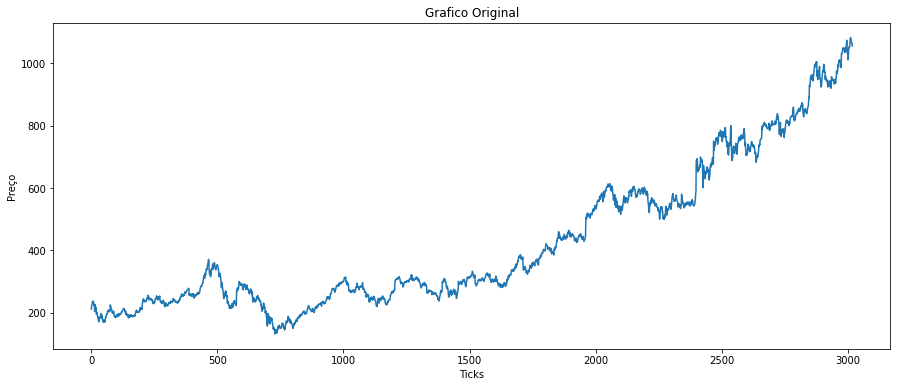

In [5]:
# grafico da ação

fig = plt.figure(1)

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Grafico Original')
ax1.plot('Ticks', 'Open', data=g_stk);

In [6]:
# média movel de 80 periodos

g_stk['MA']  = g_stk['Open'].rolling(window=80).mean()
g_stk.head(3)

,Open,High,Low,Close,Volume,Name,Ticks,MA
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1,NaN
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2,NaN


In [7]:
# filtro sem NaN

filter_g = g_stk[(g_stk['Ticks'] >= 900) & (g_stk['Ticks'] <= 1100)]
filter_g.head(3)

,Open,High,Low,Close,Volume,Name,Ticks,MA
Date,,,,,,,,
2009-07-31,225.21,226.58,221.44,221.75,2861550,GOOGL,900,205.07250
2009-08-03,224.59,227.18,224.04,226.33,2591173,GOOGL,901,205.60575
2009-08-04,224.91,227.23,224.44,227.09,2390098,GOOGL,902,206.10550


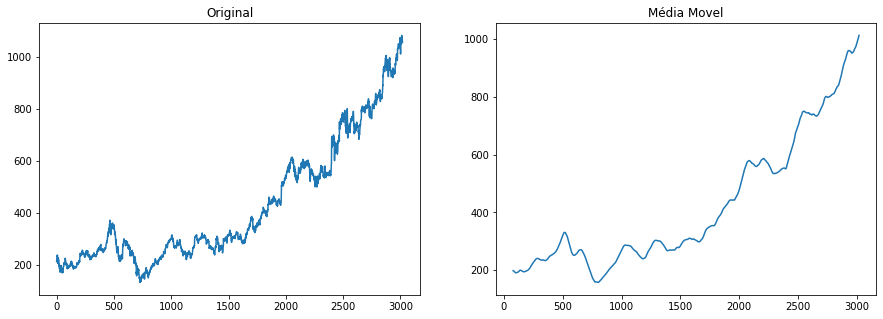

In [8]:
# grafico comparação
# suavisção dos dados

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot('Ticks', 'Open', data=g_stk)
axes[0].set_title('Original')

axes[1].plot('Ticks', 'MA', data=g_stk)
axes[1].set_title('Média Movel');

In [9]:
# suavização exponecial simples

In [10]:
# importando dados

dataparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('./data/AirPassengers.csv', 
                    parse_dates=['Month'], 
                    index_col='Month', 
                    date_parser=dataparse)
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [11]:
# uso do SimpleExpSmoothing

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, 
                                    optimized=False)

#previsão 12meses
fcast1 = fit1.forecast(12).rename(r'$alpha=0.2$')

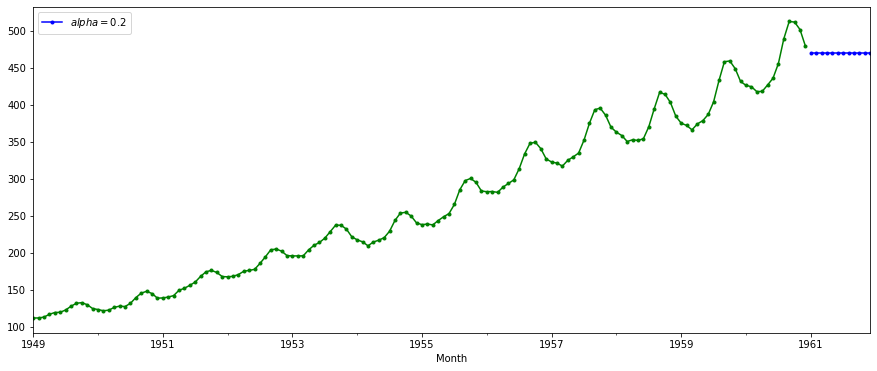

In [12]:
# visualização da previsão

fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.', color='green');

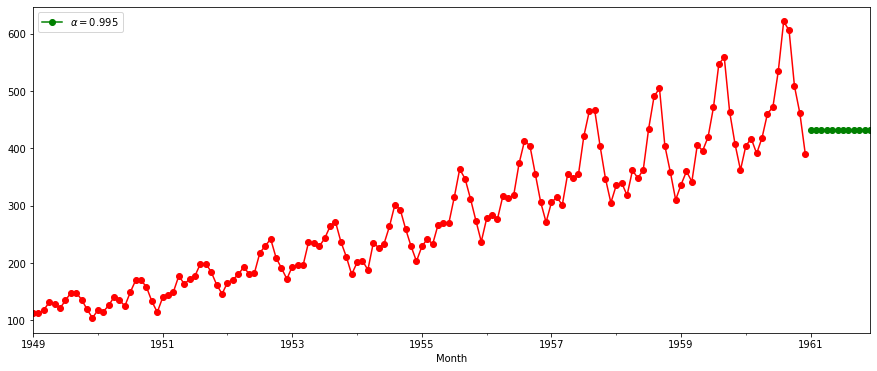

In [13]:
# otmização 

fit3 = SimpleExpSmoothing(data).fit()
fcast3 =fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='red');

In [14]:
# criação do modelo

fit1 = Holt(data).fit(smoothing_level=0.8,
                      smoothing_slope=0.2,
                      optimized=False)

fcast1 = fit1.forecast(12).rename('Holts linear trend')

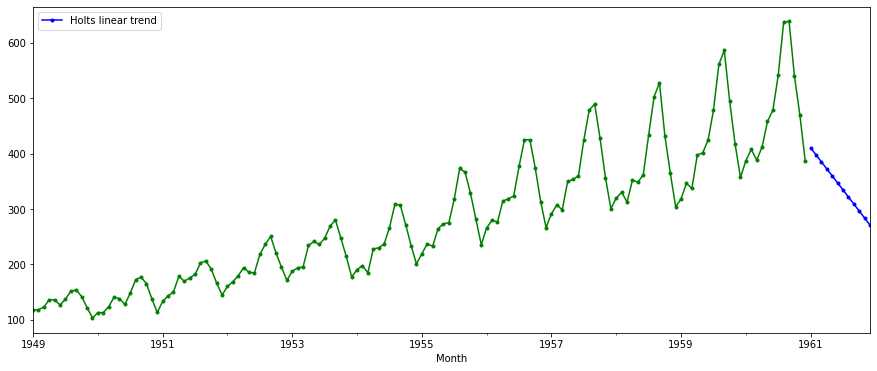

In [15]:
# visualização grafica do modelo

fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.', color='green');

In [16]:
# otmização do modelo

# criação do modelo

fit3 = Holt(data, damped=True).fit(smoothing_level=0.8,
                                   smoothing_slope=0.2)

fcast3 = fit3.forecast(12).rename('Adtivo Amortecido')

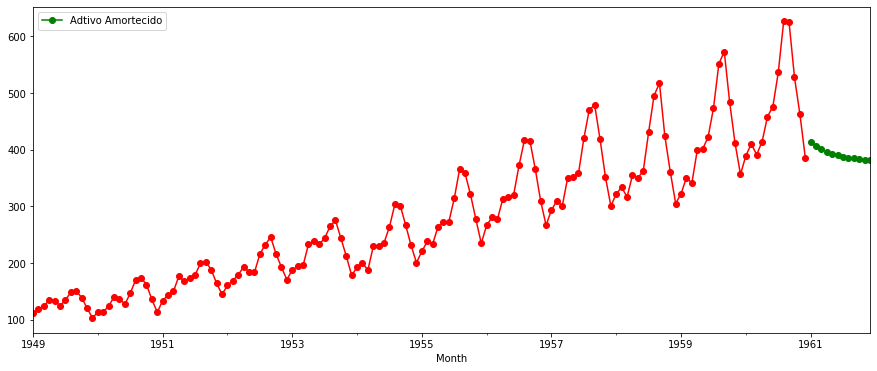

In [17]:
# otmização amortecido

fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='red');

In [18]:
# holt winters(acompanha o padrão da serie temporal)

In [19]:
# criando modelo

fit1 = ExponentialSmoothing(data, 
                            seasonal_periods=12, 
                            trend='additive', 
                            seasonal='additive').fit()

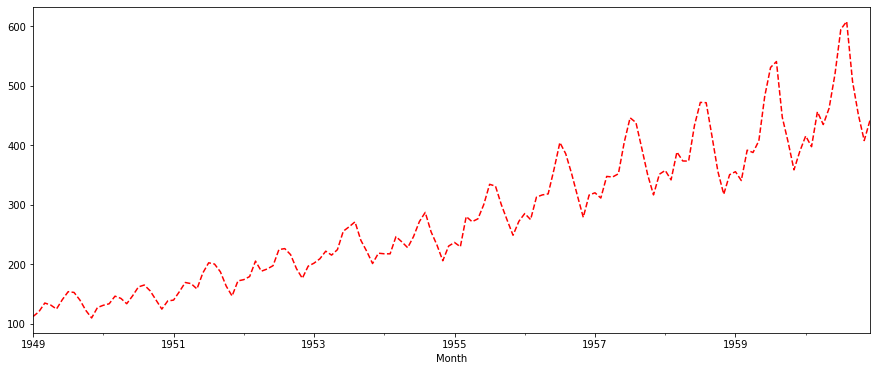

In [20]:
# grafico do modelo

fit1.fittedvalues.plot(style='--', color='red');

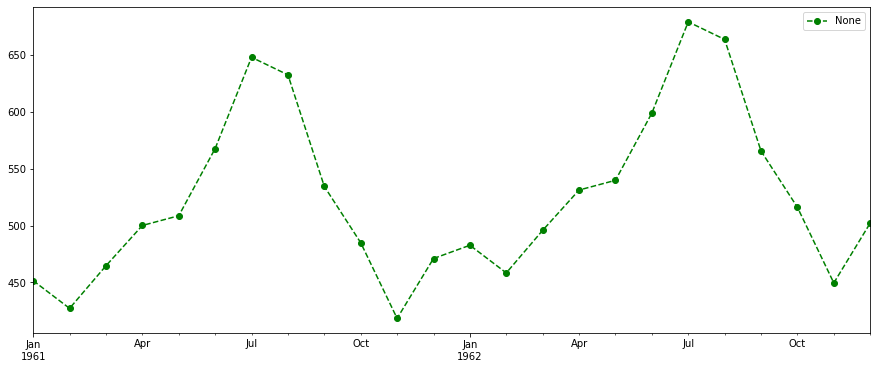

In [21]:
# previsão do modelo 24M

fit1.forecast(24).plot(style='--',
                       marker='o',
                       color='green',
                       legend=True);

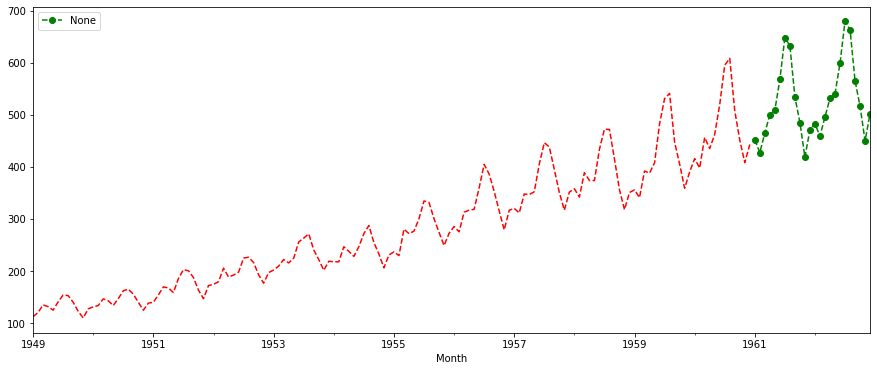

In [22]:
# união graficos

# grafico do modelo
fit1.fittedvalues.plot(style='--', color='red')

# previsão do modelo 24M
fit1.forecast(24).plot(style='--',
                       marker='o',
                       color='green',
                       legend=True);

In [23]:
# arima
# criação dos diagramas PACF(autocorrelação parcial) e ACF(autocorrelação)

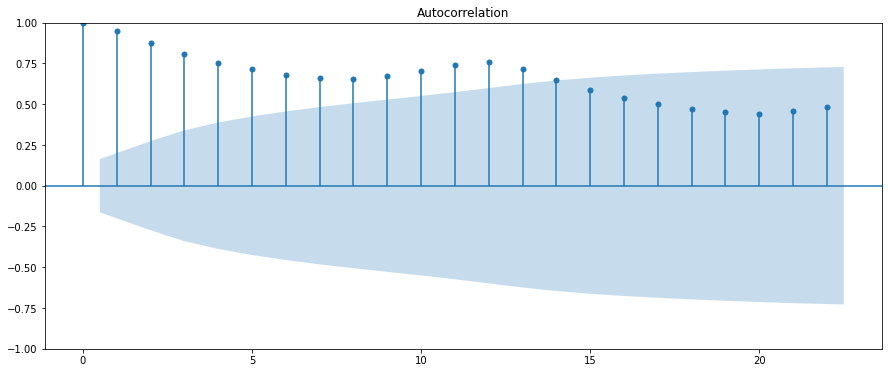

In [24]:
# grafico diagrama de autocorrelação(ACF)

plot_acf(data)
plt.show();

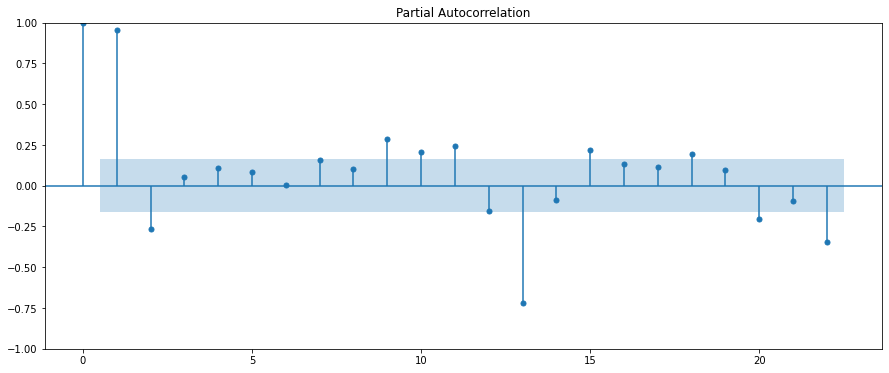

In [25]:
# grafico diagrama de autocorrelação(ACF)

plot_pacf(data)
plt.show();

In [26]:
# criação e fit do modelo(p,d,q)

model_arima = ARIMA(data, order=(5,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Tue, 24 May 2022   AIC                           1390.135
Time:                        08:39:30   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

In [27]:
# criação e fit do modelo(p,d,q)

model_arima = ARIMA(data, order=(2,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -685.169
Date:                Tue, 24 May 2022   AIC                           1378.338
Time:                        08:39:30   BIC                           1390.190
Sample:                    01-01-1949   HQIC                          1383.154
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0907      0.083     13.190      0.000       0.929       1.253
ar.L2         -0.4890      0.097     -5.046      0.000      -0.679      -0.299
ma.L1         -0.8439      0.073    -11.486      0.0

In [28]:
# criação e fit do modelo(p,d,q)

model_arima = ARIMA(data, order=(2,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -695.294
Date:                Tue, 24 May 2022   AIC                           1396.588
Time:                        08:39:30   BIC                           1405.476
Sample:                    01-01-1949   HQIC                          1400.200
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3815      0.088      4.351      0.000       0.210       0.553
ar.L2         -0.2279      0.065     -3.518      0.000      -0.355      -0.101
sigma2       977.5538    111.534      8.765      0.0

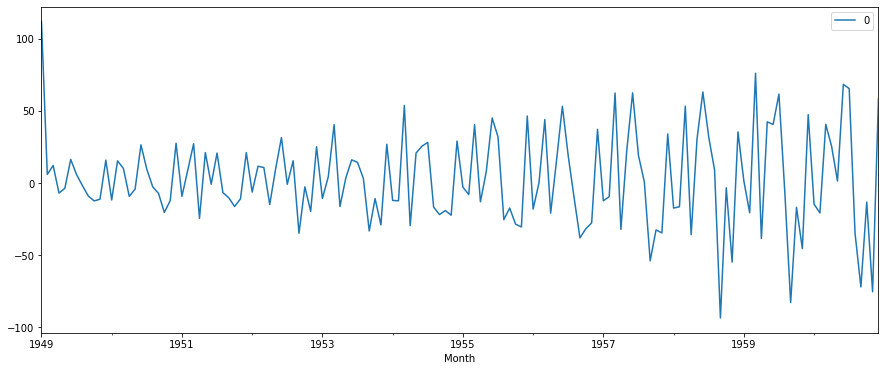

In [29]:
# residuais no modelo

resid = pd.DataFrame(model_arima_fit.resid)
resid.plot()
plt.show();

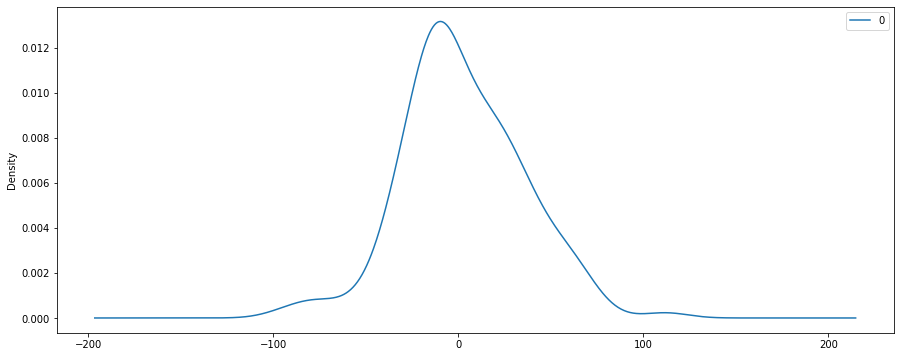

                0
count  144.000000
mean     2.818626
std     32.517191
min    -93.580702
25%    -16.713262
50%     -2.155845
75%     25.208576
max    112.000000


In [30]:
# diagram de densidade dos residuos

resid.plot(kind='kde')
plt.show()
print(resid.describe())

In [31]:
# Hold-out para avaliação do modelo

X = data.values

Previsto = 364.4000265247501, esperado = [340]
Previsto = 349.15366759523647, esperado = [318]
Previsto = 318.6646127672943, esperado = [362]
Previsto = 381.603528688543, esperado = [348]
Previsto = 342.84033630213577, esperado = [363]
Previsto = 367.178863785525, esperado = [435]
Previsto = 446.79985524331755, esperado = [491]
Previsto = 485.17392008736897, esperado = [505]
Previsto = 480.4879732740223, esperado = [404]
Previsto = 347.3658325231012, esperado = [359]
Previsto = 350.1323183274213, esperado = [310]
Previsto = 310.83076842159284, esperado = [337]
Previsto = 368.11881923980167, esperado = [360]
Previsto = 378.27824355680406, esperado = [342]
Previsto = 342.5242427191336, esperado = [406]
Previsto = 427.9151679028576, esperado = [396]
Previsto = 384.0583702193683, esperado = [420]
Previsto = 418.75183346964025, esperado = [472]
Previsto = 471.39304227338727, esperado = [548]
Previsto = 545.3359200339596, esperado = [559]
Previsto = 526.9950819106243, esperado = [463]
Previs

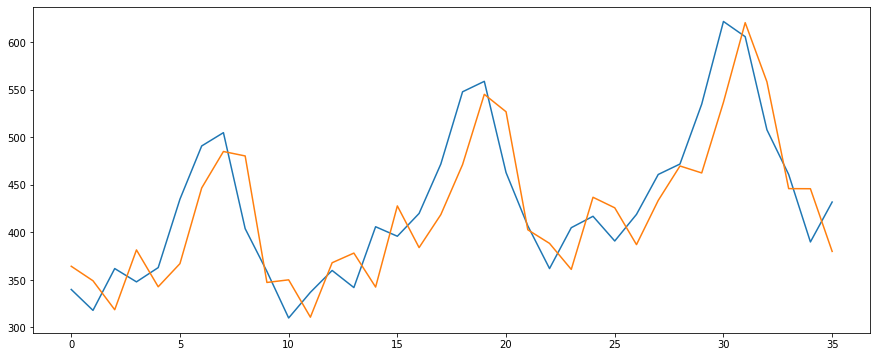

In [32]:
# criando divisão na base de dados para treino e teste

size = int(len(X)*0.75)
train, test = X[0:size], X[size:len(X)]
hist = [x for x in train]
predict = list()

for t in range(len(test)):
    # parametro do modelo
    model_arima = ARIMA(hist, order=(2,1,1))
    
    # fit do modelo e prev
    model_arima_fit = model_arima.fit()
    output = model_arima_fit.forecast()
    
    # previsão
    yhat= output[0]
    predict.append(yhat)
    
    # esperado
    obs = test[t]
    hist.append(obs)

    print(f'Previsto = {yhat}, esperado = {obs}')

plt.plot(test)
plt.plot(predict)
plt.show();

In [33]:
# autoARIMA

In [34]:
from pmdarima.arima import auto_arima

In [35]:
# encontrando os melhoes parametros

stp_ws = auto_arima(data, 
                    start_p=1,
                    start_q=2,
                    max_p=6,
                    max_q=6,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=1,
                    D=1,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True) # true

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1024.718, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.14 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.24 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.20 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [36]:
# melhor performace

print(stp_ws.aic())

1019.1780567487556


In [ ]:
# best model Best model:  ARIMA(0,1,1)(2,1,0)[12]


In [37]:
# encontrando os melhoes parametros

stp_ws = auto_arima(data, 
                    start_p=1,
                    start_q=2,
                    max_p=6,
                    max_q=6,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=1,
                    D=1,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=False) # false

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.39 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.14 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.25 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=0.93 sec
 ARIM

In [38]:
print(stp_ws.aic())

1012.9907964679802


In [39]:
# previsão

# dados de treino
train = data.loc['1948-01-01':'1959-12-01']

# dados de test
test = data.loc['1960-01-01':]

In [40]:
# treino

stp_ws.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [41]:
# previsão proximo 12M

fut_forecast = stp_ws.predict(n_periods=12)

In [42]:
# dataFrame com as previsões 

fut_forecast = pd.DataFrame(fut_forecast,
                            index=test.index,
                            columns=['#Passengers'])

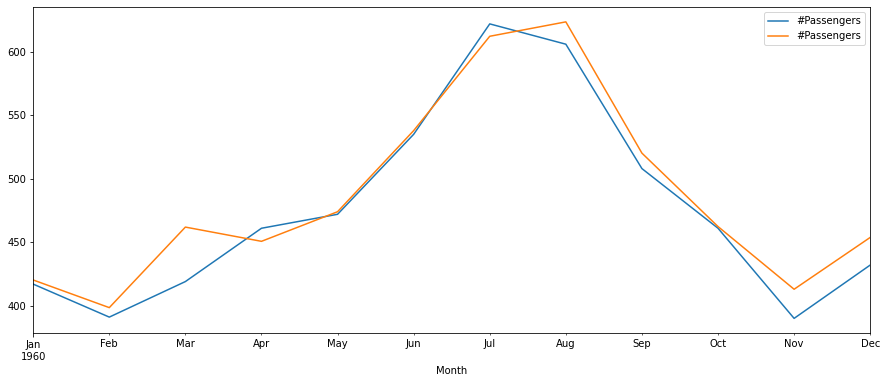

In [43]:
# visualização 

pd.concat([test, fut_forecast], axis=1).plot();

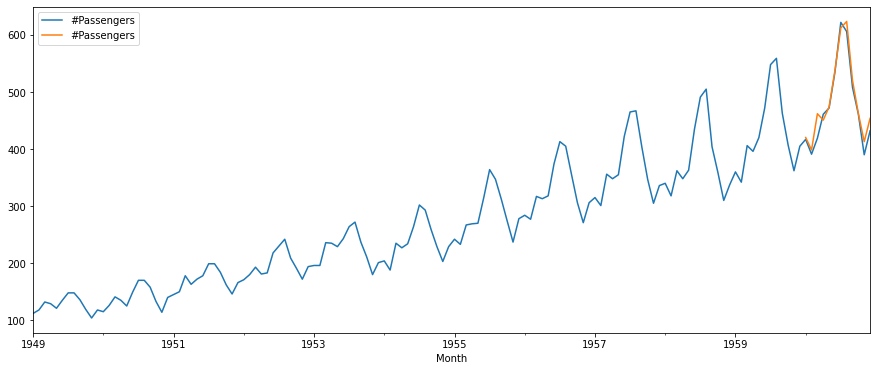

In [44]:
# visualização 

pd.concat([data, fut_forecast], axis=1).plot();